# Data Cleaning & Tidy Process

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np

# -------------------------------------------------------------------
# LOADING AND INITIALIZING THE ORIGINAL DATASET AS A PANDAS DATAFRAME
# -------------------------------------------------------------------

df_fed = pd.read_csv("fed_rd_year&gdp.csv")

print("Untidy (Original) Dataset:")
display(df_fed) 

# Values were displayed in scientific notation; this fixes that
pd.set_option('display.float_format', '{:,.0f}'.format)


''' 
Note: I've opted to use display() instead of
print() when showing df_fed because of its
capabilities in Jupyter to show the data in a
clearer, more visually appealing table. For my
data viewing purposes, I had no issues using 
display() over print().
'''

Untidy (Original) Dataset:


,department,1976_gdp1790000000000.0,1977_gdp2028000000000.0,1978_gdp2278000000000.0,1979_gdp2570000000000.0,1980_gdp2797000000000.0,1981_gdp3138000000000.0,1982_gdp3314000000000.0,1983_gdp3541000000000.0,1984_gdp3953000000000.0,1985_gdp4270000000000.0,1986_gdp4536000000000.0,1987_gdp4782000000000.0,1988_gdp5155000000000.0,1989_gdp5570000000000.0,1990_gdp5915000000000.0,1991_gdp6110000000000.0,1992_gdp6435000000000.0,1993_gdp6795000000000.0,1994_gdp7198000000000.0,1995_gdp7583000000000.0,1996_gdp7978000000000.0,1997_gdp8483000000000.0,1998_gdp8955000000000.0,1999_gdp9511000000000.0,2000_gdp10148000000000.0,2001_gdp10565000000000.0,2002_gdp10877000000000.0,2003_gdp11332000000000.0,2004_gdp12089000000000.0,2005_gdp12889000000000.0,2006_gdp13685000000000.0,2007_gdp14323000000000.0,2008_gdp14752000000000.0,2009_gdp14415000000000.0,2010_gdp14799000000000.0,2011_gdp15379000000000.0,2012_gdp16027000000000.0,2013_gdp16516000000000.0,2014_gdp17244000000000.0,2015_gdp17983000000000.0,2016_gdp18470000000000.0,2017_gdp19177000000000.0
0,DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360000000,979000000,1333000000,1559000000,1583000000,1181000000,1155000000,1258000000,1009000000,848000000,527000000,737000000,1092000000,960000000,602000000,735000000
1,DOC,"819,000,000","837,000,000","871,000,000","952,000,000","945,000,000","829,000,000","693,000,000","700,000,000","755,000,000","789,000,000","778,000,000","804,000,000","764,000,000","766,000,000","784,000,000","898,000,000","952,000,000","1,265,000,000","1,595,000,000","1,709,000,000","1,488,000,000","1,421,000,000","1,589,000,000","1,559,000,000","1,654,000,000","1,417,000,000",1661000000,1591000000,1452000000,1410000000,1293000000,1271000000,1379000000,1594000000,1521000000,1357000000,1373000000,1397000000,1641000000,1596000000,1730000000,1824000000
2,DOD,"35,696,000,000","37,967,000,000","37,022,000,000","37,174,000,000","37,005,000,000","41,737,000,000","46,893,000,000","51,008,000,000","58,139,000,000","64,416,000,000","68,931,000,000","71,541,000,000","71,145,000,000","69,231,000,000","65,589,000,000","62,238,000,000","61,682,000,000","61,956,000,000","55,423,000,000","54,026,000,000","53,688,000,000","54,903,000,000","54,716,000,000","55,927,000,000","56,297,000,000","58,807,000,000",67534000000,78782000000,85503000000,88331000000,90443000000,93645000000,94247000000,93527000000,94325000000,88220000000,81543000000,70583000000,70341000000,69522000000,75213000000,51862000000
3,DOE,"10,882,000,000","13,741,000,000","15,663,000,000","15,612,000,000","15,226,000,000","14,798,000,000","12,160,000,000","11,129,000,000","11,731,000,000","12,043,000,000","10,911,000,000","10,446,000,000","10,863,000,000","11,225,000,000","12,103,000,000","12,275,000,000","13,280,000,000","11,872,000,000","10,568,000,000","9,806,000,000","9,412,000,000","9,167,000,000","9,250,000,000","10,019,000,000","9,800,000,000","10,640,000,000",10938000000,11232000000,11296000000,10835000000,10451000000,10709000000,11343000000,11823000000,12329000000,11902000000,11839000000,11528000000,12686000000,15033000000,15504000000,15032000000
4,DOT,"1,142,000,000","1,095,000,000","1,156,000,000","1,004,000,000","1,048,000,000","978,000,000","702,000,000","800,000,000","1,018,000,000","885,000,000","746,000,000","595,000,000","587,000,000","586,000,000","613,000,000","688,000,000","1,014,000,000","990,000,000","1,000,000,000","1,018,000,000","902,000,000","902,000,000","859,000,000","873,000,000","855,000,000","989,000,000",1053000000,929000000,862000000,888000000,995000000,909000000,1016000000,1062000000,1221000000,1064000000,1007000000,881000000,843000000,926000000,910000000,936000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,NIH,"8,025,000,000","8,214,000,000","8,802,000,000","9,243,000,000","9,093,000,000","8,580,000,000","8,314,000,00

" \nNote: I've opted to use display() instead of\nprint() when showing df_fed because of its\ncapabilities in Jupyter to show the data in a\nclearer, more visually appealing table. For my\ndata viewing purposes, I had no issues using \ndisplay() over print().\n"

#### A Note on the Original Dataset:

The original dataset has a number of issues:
1. Column headers contain values (i.e. "1976" and "1790000000000.0") instead of variables (i.e. "year" and "total GDP").
2. Multiple variables are stored together (again, year and total GDP). This becomes especially apparent later on, when we melt the dataframe.

We can fix the first issue by using pd.melt() and the second by using str.split().


In [163]:
# ---------------------
# MELTING THE DATAFRAME
# ---------------------

# Creating a list of columns I'll want to use as my value_vars for pd.melt()
gdp_yrs = df_fed.columns.tolist()
gdp_yrs.remove('department')

# Melting the DataFrame
df_fed = pd.melt(df_fed,
                 id_vars=['department'],
                 value_vars=gdp_yrs,
                 var_name='yr_total_gdp', value_name='rd_budget')

# Displaying the melted DataFrame
display(df_fed)


,department,yr_total_gdp,rd_budget
0,DHS,1976_gdp1790000000000.0,NaN
1,DOC,1976_gdp1790000000000.0,"819,000,000"
2,DOD,1976_gdp1790000000000.0,"35,696,000,000"
3,DOE,1976_gdp1790000000000.0,"10,882,000,000"
4,DOT,1976_gdp1790000000000.0,"1,142,000,000"
...,...,...,...
583,NIH,2017_gdp19177000000000.0,"33,052,000,000"
584,NSF,2017_gdp19177000000000.0,"6,040,000,000"
585,Other,2017_gdp19177000000000.0,"1,553,000,000"
586,USDA,2017_gdp19177000000000.0,"2,625,000,000"


In [164]:
# --------------------------
# SPLITTING YEAR & TOTAL GDP
# --------------------------

# Performing the split and dropping the original, unsplit column
df_fed[['year', 'total_gdp']] = df_fed['yr_total_gdp'].str.split('_', expand=True)
df_fed.drop(columns=['yr_total_gdp'], inplace=True)

# Removing 'gdp' from total_gdp column while keeping the numerical GDP value
df_fed['total_gdp'] = df_fed['total_gdp'].str.replace('gdp', '', regex=True)

# Convert total_gdp to numeric values (float)
df_fed['total_gdp'] = pd.to_numeric(df_fed['total_gdp'], errors='coerce')

# Displaying the split dataframe
display(df_fed)

,department,rd_budget,year,total_gdp
0,DHS,NaN,1976,"1,790,000,000,000"
1,DOC,"819,000,000",1976,"1,790,000,000,000"
2,DOD,"35,696,000,000",1976,"1,790,000,000,000"
3,DOE,"10,882,000,000",1976,"1,790,000,000,000"
4,DOT,"1,142,000,000",1976,"1,790,000,000,000"
...,...,...,...,...
583,NIH,"33,052,000,000",2017,"19,177,000,000,000"
584,NSF,"6,040,000,000",2017,"19,177,000,000,000"
585,Other,"1,553,000,000",2017,"19,177,000,000,000"
586,USDA,"2,625,000,000",2017,"19,177,000,000,000"


In [165]:
# ------------------
# FILLING NaN VALUES
# ------------------

df_fed = df_fed.fillna(0)

'''
Values are missing for DHS from 1976 to 2001.
I confirmed via Internet search that this is because
DHS was established in 2002; thus the US government
budgeted no money to DHS prior to its establishment.
I concluded from this that it is safe to fill missing
values with zeros, as this accurately reflects the
zero US dollars budgeted to DHS from 1976 to 2001.
'''

'\nValues are missing for DHS from 1976 to 2001.\nI confirmed via Internet search that this is because\nDHS was established in 2002; thus the US government\nbudgeted no money to DHS prior to its establishment.\nI concluded from this that it is safe to fill missing\nvalues with zeros, as this accurately reflects the\nzero US dollars budgeted to DHS from 1976 to 2001.\n'

In [166]:
# ---------------------
# VIEWING THE DATAFRAME
# ---------------------

full_frame = False 

'''
By changing the above variable, full_frame, from the boolean
value False to True, you may view the entire tidied DataFrame.

The default value of full_frame is False. When set to False,
only the first and last five rows of the DataFrame will display
when you run this code.
'''

if full_frame == True:
    pd.set_option("display.max_rows", None)
else:
    pd.set_option("display.max_rows", 10)

print("Tidied Dataset:")
display(df_fed)
    

Tidied Dataset:


,department,rd_budget,year,total_gdp
0,DHS,0,1976,"1,790,000,000,000"
1,DOC,"819,000,000",1976,"1,790,000,000,000"
2,DOD,"35,696,000,000",1976,"1,790,000,000,000"
3,DOE,"10,882,000,000",1976,"1,790,000,000,000"
4,DOT,"1,142,000,000",1976,"1,790,000,000,000"
...,...,...,...,...
583,NIH,"33,052,000,000",2017,"19,177,000,000,000"
584,NSF,"6,040,000,000",2017,"19,177,000,000,000"
585,Other,"1,553,000,000",2017,"19,177,000,000,000"
586,USDA,"2,625,000,000",2017,"19,177,000,000,000"


#### A Note on the Tidied Dataset:

After tidying the dataset:
1. Each variable forms a column (department, rd_budget, year, and total_gdp)
2. Each observation forms a row (one row for all 588 unique observations [42 years x 14 departments = 588 unique observations])
3. Each value is a cell (year and total_gdp values split into separate cells)

A pivot table (see below) can organize the data for the purposes of my data visualizations.

In [178]:
df_fed_pivot = df_fed.pivot_table(index=['year'],
                                  columns='department',
                                  values='rd_budget',
                                  aggfunc='mean')

print("Pivot Table from Tidied Dataset - R&D Budget:")
display(df_fed_pivot)

''' 
Note: I removed total_gdp from the pivot table
because it is irrelevant for the ways in which
I've chosen to analyze the data. This pivot 
table provides only a simple view of the data
with which we can display changes in R&D budget.
However, if including total_gdp, I would place it
here as a second index along with year. 
'''


Pivot Table from Tidied Dataset - R&D Budget:


department,DHS,DOC,DOD,DOE,DOT,EPA,HHS,Interior,NASA,NIH,NSF,Other,USDA,VA
year,,,,,,,,,,,,,,
1976,0,"819,000,000","35,696,000,000","10,882,000,000","1,142,000,000","968,000,000","9,226,000,000","1,152,000,000","12,513,000,000","8,025,000,000","2,372,000,000","1,191,000,000","1,837,000,000","404,000,000"
1977,0,"837,000,000","37,967,000,000","13,741,000,000","1,095,000,000","966,000,000","9,507,000,000","1,082,000,000","12,553,000,000","8,214,000,000","2,395,000,000","1,280,000,000","1,796,000,000","374,000,000"
1978,0,"871,000,000","37,022,000,000","15,663,000,000","1,156,000,000","1,175,000,000","10,533,000,000","1,125,000,000","12,516,000,000","8,802,000,000","2,446,000,000","1,237,000,000","1,962,000,000","356,000,000"
1979,0,"952,000,000","37,174,000,000","15,612,000,000","1,004,000,000","1,102,000,000","10,127,000,000","1,176,000,000","13,079,000,000","9,243,000,000","2,404,000,000","2,321,000,000","2,054,000,000","353,000,000"
1980,0,"945,000,000","37,005,000,000","15,226,000,000","1,048,000,000","903,000,000","10,045,000,000","1,082,000,000","13,837,000,000","9,093,000,000","2,407,000,000","2,468,000,000","1,887,000,000","359,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,"737,000,000","1,397,000,000","70,583,000,000","11,528,000,000","881,000,000","570,000,000","32,095,000,000","846,000,000","11,845,000,000","30,522,000,000","5,739,000,000","1,846,000,000","2,279,000,000","1,253,000,000"
2014,"1,092,000,000","1,641,000,000","70,341,000,000","12,686,000,000","843,000,000","569,000,000","32,438,000,000","889,000,000","12,432,000,000","30,938,000,000","6,135,000,000","1,697,000,000","2,517,000,000","1,165,000,000"
2015,"960,000,000","1,596,000,000","69,522,000,000","15,033,000,000","926,000,000","544,000,000","31,537,000,000","903,000,000","11,927,000,000","30,046,000,000","6,260,000,000","1,558,000,000","2,565,000,000","1,231,000,000"


" \nNote: I removed total_gdp from the pivot table\nbecause it is irrelevant for the ways in which\nI've chosen to analyze the data. This pivot \ntable provides only a simple view of the data\nwith which we can display changes in R&D budget.\nHowever, if including total_gdp, I would place it\nhere as a second index along with year. \n"

# Data Visualizations

Text(0.5, 1.0, 'R&D Budget per US Department')

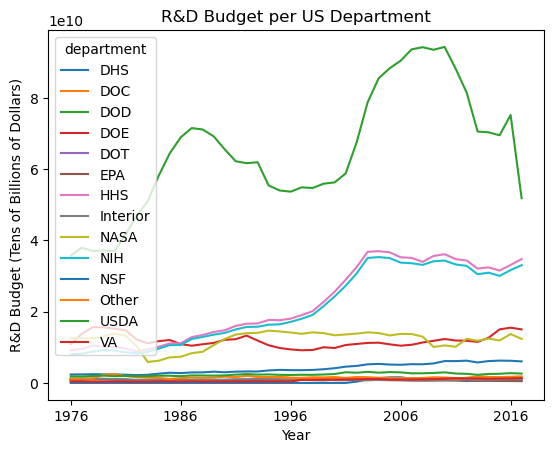

In [180]:
# ------------------------------------------------
# SUMMARY PLOT: BUDGET V. YEAR FOR EACH DEPARTMENT
# ------------------------------------------------

''' 
Quickly view and compare R&D budgets for 
each department over time, using data from
the pivot table.
'''

summary_plot = df_fed_pivot.plot()

summary_plot.set_xlabel("Year")
summary_plot.set_ylabel("R&D Budget (Tens of Billions of Dollars)")
summary_plot.set_title("R&D Budget per US Department")

Text(0.5, 1.0, 'R&D Budget per US Department')

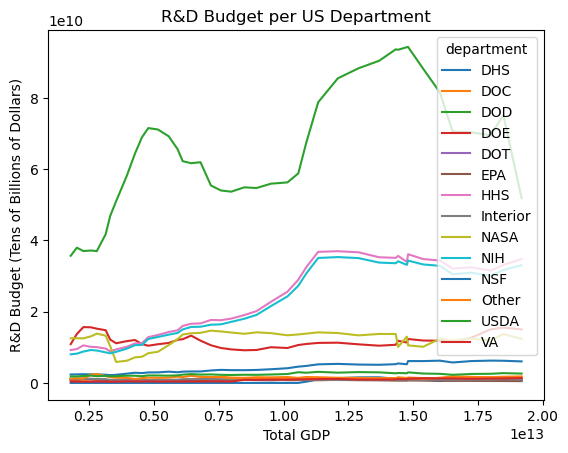

In [175]:
# INCORRECT

df_fed_pivot_2 = df_fed.pivot_table(index=['total_gdp'],
                                    columns='department',
                                    values='rd_budget',
                                    aggfunc='mean')

summary_plot_2 = df_fed_pivot_2.plot()

summary_plot_2.set_xlabel("Total GDP")
summary_plot_2.set_ylabel("R&D Budget (Tens of Billions of Dollars)")
summary_plot_2.set_title("R&D Budget per US Department")